In [ ]:
import pandas as pd

df = pd.read_csv("dataset_regresion_multiple.csv", sep=";")
df.head()


,edad,horas_ejercicio,peso,estres,ingresos,horas_tv,presion_arterial
0,58,7,81,1,21150,12,73.83
1,48,2,55,1,94740,22,82.26
2,34,2,81,3,86617,24,90.47
3,62,0,53,6,36896,34,93.49
4,27,4,60,7,66175,29,65.74


In [ ]:
num = df.select_dtypes(include='number')
resumen = num.describe().T.loc[:, ['mean','min','max']]
resumen  # medias, mínimos y máximos por columna


,mean,min,max
edad,41.600,20.00,64.00
horas_ejercicio,4.370,0.00,9.00
peso,73.280,50.00,99.00
estres,4.700,1.00,9.00
ingresos,59778.350,20412.00,99605.00
horas_tv,19.760,0.00,39.00
presion_arterial,85.395,38.14,137.27


In [ ]:
corr = num.corr()
corr  # matriz de correlación


,edad,horas_ejercicio,peso,estres,ingresos,horas_tv,presion_arterial
edad,1.000000,-0.195928,-0.000361,-0.174863,-0.114863,0.139984,0.418731
horas_ejercicio,-0.195928,1.000000,-0.021882,-0.041216,-0.005404,0.058045,-0.358865
peso,-0.000361,-0.021882,1.000000,0.056342,-0.018638,0.012098,0.588843
estres,-0.174863,-0.041216,0.056342,1.000000,-0.079145,-0.130028,0.366368
ingresos,-0.114863,-0.005404,-0.018638,-0.079145,1.000000,-0.034992,-0.009394
horas_tv,0.139984,0.058045,0.012098,-0.130028,-0.034992,1.000000,0.040789
presion_arterial,0.418731,-0.358865,0.588843,0.366368,-0.009394,0.040789,1.000000


In [ ]:
corr_target = corr['presion_arterial'].sort_values(ascending=False)
corr_target  # de mayor a menor correlación con la variable objetivo


presion_arterial    1.000000
peso                0.588843
edad                0.418731
estres              0.366368
horas_tv            0.040789
ingresos           -0.009394
horas_ejercicio    -0.358865
Name: presion_arterial, dtype: float64

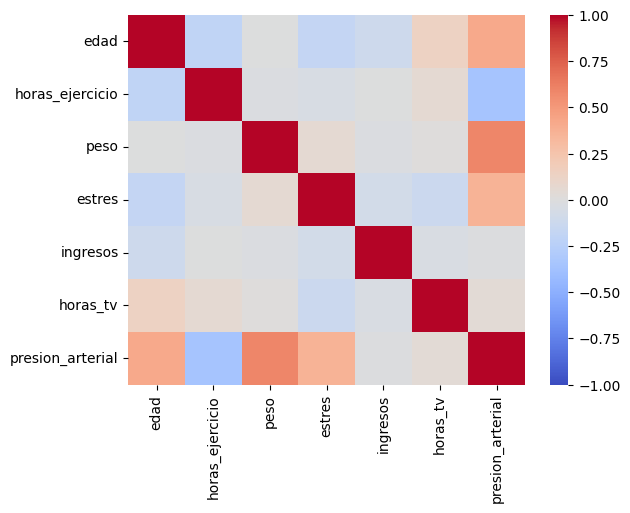

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Variables predictoras y target
X = df.drop("presion_arterial", axis=1)
y = df["presion_arterial"]

# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Métricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Resultados en tabla
resultados = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": modelo.coef_
})

print("Intercepto:", modelo.intercept_)
print("\nMétricas del modelo:")
print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

print("\nCoeficientes por variable:")
display(resultados)


Intercepto: -19.895962407050675

Métricas del modelo:
R²: 0.708
RMSE: 10.36
MAE: 8.60

Coeficientes por variable:


,Variable,Coeficiente
0,edad,0.704516
1,horas_ejercicio,-1.606815
2,peso,0.796449
3,estres,3.566095
4,ingresos,0.000098
5,horas_tv,0.133066


In [ ]:
# Modelo simplificado con las variables más relevantes
X_simplificado = df[["edad", "peso", "estres", "horas_ejercicio"]]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simplificado, y, test_size=0.2, random_state=42
)

modelo_s = LinearRegression()
modelo_s.fit(X_train_s, y_train_s)
y_pred_s = modelo_s.predict(X_test_s)

# Métricas
r2_s = r2_score(y_test_s, y_pred_s)
rmse_s = np.sqrt(mean_squared_error(y_test_s, y_pred_s))
mae_s = mean_absolute_error(y_test_s, y_pred_s)

print("Modelo completo:")
print(f"R²: {r2:.3f} | RMSE: {rmse:.2f} | MAE: {mae:.2f}")

print("\nModelo simplificado:")
print(f"R²: {r2_s:.3f} | RMSE: {rmse_s:.2f} | MAE: {mae_s:.2f}")


Modelo completo:
R²: 0.708 | RMSE: 10.36 | MAE: 8.60

Modelo simplificado:
R²: 0.743 | RMSE: 9.72 | MAE: 8.23


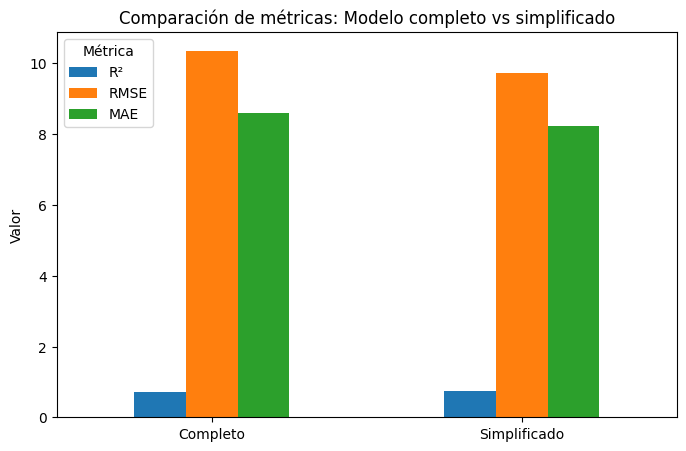

In [ ]:
import matplotlib.pyplot as plt

# Métricas en un diccionario
metricas = {
    "R²": [r2, r2_s],
    "RMSE": [rmse, rmse_s],
    "MAE": [mae, mae_s]
}

# Convertimos a DataFrame para graficar fácil
df_metricas = pd.DataFrame(metricas, index=["Completo", "Simplificado"])

# Gráfico de barras
df_metricas.plot(kind="bar", figsize=(8,5))
plt.title("Comparación de métricas: Modelo completo vs simplificado")
plt.ylabel("Valor")
plt.xticks(rotation=0)
plt.legend(title="Métrica")
plt.show()


In [ ]:
print("El modelo ajusta adecuadamente: explica ~74% de la variabilidad (R²=0.743), con errores moderados (RMSE≈9.7, MAE≈8.2); las variables más relevantes son estrés, peso, edad y horas de ejercicio, mientras que ingresos y horas de TV no aportan valor.")


El modelo ajusta adecuadamente: explica ~74% de la variabilidad (R²=0.743), con errores moderados (RMSE≈9.7, MAE≈8.2); las variables más relevantes son estrés, peso, edad y horas de ejercicio, mientras que ingresos y horas de TV no aportan valor.


In [ ]:
print("El análisis muestra que los factores que realmente influyen en la presión arterial son el estrés, el peso corporal, la edad y las horas de ejercicio. El estrés es el predictor más fuerte y se asocia con un aumento considerable de la presión. El peso y la edad también elevan la presión, mientras que el ejercicio tiene un efecto protector, reduciéndola. En cambio, los ingresos y las horas de televisión no aportan valor explicativo relevante, confirmando que las variables fisiológicas y de estilo de vida son más determinantes que las socioeconómicas en este caso.")


El análisis muestra que los factores que realmente influyen en la presión arterial son el estrés, el peso corporal, la edad y las horas de ejercicio. El estrés es el predictor más fuerte y se asocia con un aumento considerable de la presión. El peso y la edad también elevan la presión, mientras que el ejercicio tiene un efecto protector, reduciéndola. En cambio, los ingresos y las horas de televisión no aportan valor explicativo relevante, confirmando que las variables fisiológicas y de estilo de vida son más determinantes que las socioeconómicas en este caso.
